<a href="https://colab.research.google.com/github/orcuncakaar/orcuncakaar/blob/main/17_AdaBoostRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [272]:
df = pd.read_csv('cardekho.csv')

In [273]:
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [275]:
df.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00
mean,9811.86,6.04,55616.48,19.70,1486.06,100.59,5.33,774971.12
std,5643.42,3.01,51618.55,4.17,521.11,42.97,0.81,894128.36
min,0.00,0.00,100.00,4.00,793.00,38.40,0.00,40000.00
25%,4906.50,4.00,30000.00,17.00,1197.00,74.00,5.00,385000.00
50%,9872.00,6.00,50000.00,19.67,1248.00,88.50,5.00,556000.00
75%,14668.50,8.00,70000.00,22.70,1582.00,117.30,5.00,825000.00
max,19543.00,29.00,3800000.00,33.54,6592.00,626.00,9.00,39500000.00


In [276]:
df = df.drop(columns=['Unnamed: 0'])

In [277]:
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [278]:
df[df.duplicated()]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
197,Honda City,Honda,City,8,70000,Individual,Petrol,Manual,16.80,1497,116.30,5,545000
360,Maruti Baleno,Maruti,Baleno,2,5000,Individual,Petrol,Automatic,21.40,1197,83.10,5,686000
1353,Maruti Swift Dzire,Maruti,Swift Dzire,4,50000,Individual,Diesel,Manual,28.40,1248,74.02,5,680000
1429,Maruti Wagon R,Maruti,Wagon R,13,100000,Individual,Petrol,Manual,18.90,1061,67.00,5,150000
1485,Hyundai i20,Hyundai,i20,3,50000,Individual,Petrol,Manual,18.60,1197,81.83,5,625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15229,Maruti Swift,Maruti,Swift,8,80000,Individual,Diesel,Manual,22.90,1248,74.00,5,350000
15324,Maruti Wagon R,Maruti,Wagon R,6,50000,Individual,CNG,Manual,26.60,998,58.16,5,450000
15367,Tata Tiago,Tata,Tiago,4,30000,Individual,Petrol,Manual,23.84,1199,84.00,5,350000
15378,Hyundai Grand,Hyundai,Grand,6,30000,Individual,Petrol,Manual,18.90,1197,82.00,5,450000


In [279]:
df.drop_duplicates(keep = "first",ignore_index=True,inplace=True)

In [280]:
df[df.duplicated()]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price


In [281]:
df["seats"].value_counts()

,count
seats,
5,12767
7,1902
8,310
6,125
4,76
9,55
2,7
0,2


In [282]:
df["seats"] == 0

,seats
0,False
1,False
2,False
3,False
4,False
...,...
15239,False
15240,False
15241,False
15242,False


In [283]:
df[df['seats'] ==0]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
3207,Honda City,Honda,City,18,40000,Individual,Petrol,Manual,13.00,1493,100.00,0,115000
12504,Nissan Kicks,Nissan,Kicks,2,10000,Individual,Diesel,Manual,19.39,1461,108.49,0,1154000


In [284]:
df.loc[df['seats'] ==0,'seats'] = 5

In [285]:
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15239,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15240,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15241,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15242,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [286]:
df[df['seats'] ==0]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price


In [287]:
df["seats"].value_counts()

,count
seats,
5,12769
7,1902
8,310
6,125
4,76
9,55
2,7


In [288]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15244.00,15244.00,15244.00,15244.00,15244.00,15244.00,15244.00
mean,6.04,55639.58,19.70,1486.17,100.61,5.33,774701.45
std,3.02,51766.30,4.17,520.42,42.92,0.81,894676.08
min,0.00,100.00,4.00,793.00,38.40,2.00,40000.00
25%,4.00,30000.00,17.00,1197.00,74.00,5.00,385000.00
50%,6.00,50000.00,19.67,1248.00,88.50,5.00,559000.00
75%,8.00,70000.00,22.70,1582.00,117.30,5.00,825000.00
max,29.00,3800000.00,33.54,6592.00,626.00,9.00,39500000.00


In [289]:
pd.set_option("display.float_format","{:.2f}".format)

In [290]:
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15239,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15240,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15241,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15242,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [291]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15244.00,15244.00,15244.00,15244.00,15244.00,15244.00,15244.00
mean,6.04,55639.58,19.70,1486.17,100.61,5.33,774701.45
std,3.02,51766.30,4.17,520.42,42.92,0.81,894676.08
min,0.00,100.00,4.00,793.00,38.40,2.00,40000.00
25%,4.00,30000.00,17.00,1197.00,74.00,5.00,385000.00
50%,6.00,50000.00,19.67,1248.00,88.50,5.00,559000.00
75%,8.00,70000.00,22.70,1582.00,117.30,5.00,825000.00
max,29.00,3800000.00,33.54,6592.00,626.00,9.00,39500000.00


<Axes: xlabel='vehicle_age', ylabel='selling_price'>

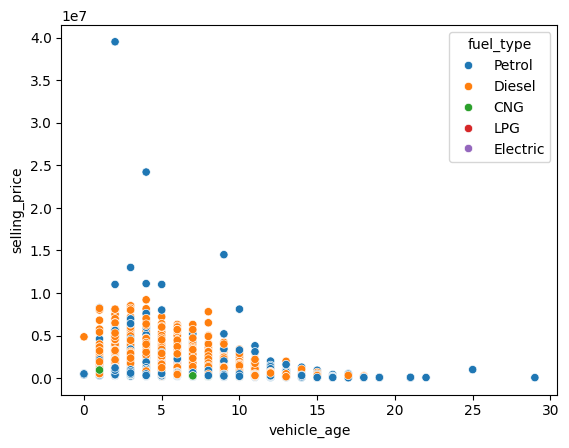

In [292]:
sns.scatterplot(x=df['vehicle_age'],y=df['selling_price'],hue=df['fuel_type'])

In [293]:
df = df[df["selling_price"]<15000000]

In [294]:
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15239,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15240,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15241,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15242,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [295]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15242.00,15242.00,15242.00,15242.00,15242.00,15242.00,15242.00
mean,6.04,55646.31,19.70,1485.68,100.54,5.33,770623.86
std,3.02,51766.37,4.17,518.45,42.56,0.81,816170.02
min,0.00,100.00,6.00,793.00,38.40,2.00,40000.00
25%,4.00,30000.00,17.00,1197.00,74.00,5.00,385000.00
50%,6.00,50000.00,19.67,1248.00,88.50,5.00,559000.00
75%,8.00,70000.00,22.70,1582.00,117.30,5.00,825000.00
max,29.00,3800000.00,33.54,5998.00,626.00,9.00,14500000.00


<Axes: xlabel='vehicle_age', ylabel='selling_price'>

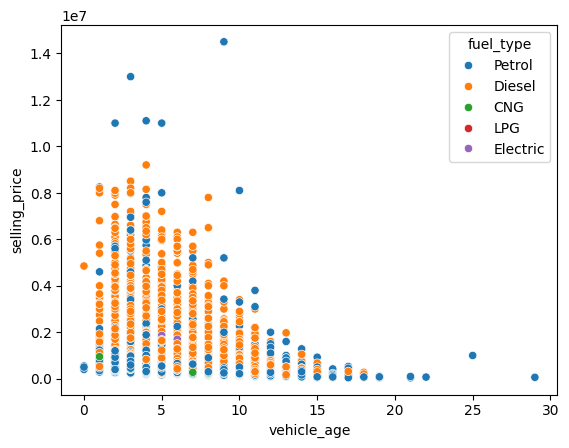

In [296]:
sns.scatterplot(x=df['vehicle_age'],y=df['selling_price'],hue=df['fuel_type'])

<Axes: xlabel='fuel_type', ylabel='selling_price'>

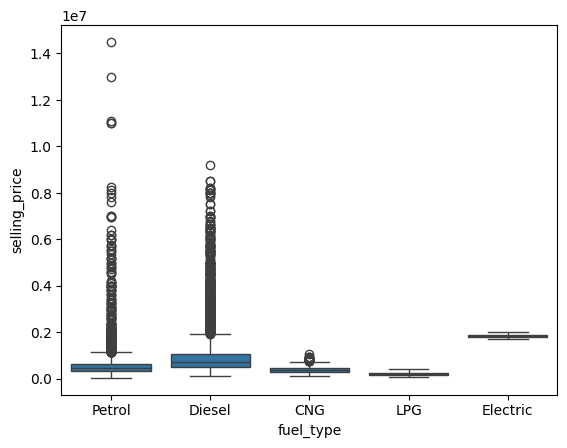

In [297]:
sns.boxplot(x=df['fuel_type'],y=df['selling_price'])

<Axes: xlabel='transmission_type', ylabel='selling_price'>

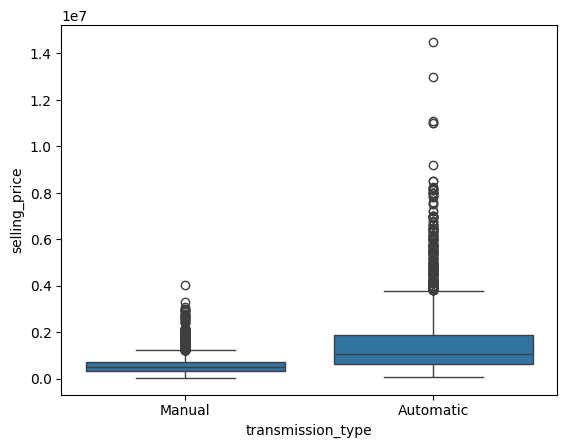

In [298]:
sns.boxplot(x=df["transmission_type"], y=df['selling_price'])

In [299]:
df.corr(numeric_only=True)

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.00,0.33,-0.26,0.10,0.01,0.03,-0.26
km_driven,0.33,1.00,-0.11,0.19,0.05,0.19,-0.08
mileage,-0.26,-0.11,1.00,-0.63,-0.53,-0.44,-0.32
engine,0.10,0.19,-0.63,1.00,0.81,0.56,0.61
max_power,0.01,0.05,-0.53,0.81,1.00,0.18,0.77
seats,0.03,0.19,-0.44,0.56,0.18,1.00,0.13
selling_price,-0.26,-0.08,-0.32,0.61,0.77,0.13,1.00


In [300]:
X = df.drop("selling_price",axis=1)
y = df["selling_price"]

In [301]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15)

In [302]:
cat_cols = df.select_dtypes(include="object").columns.to_list()
cat_cols

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [303]:
unique_values = df[cat_cols].nunique()
unique_values

,0
car_name,119
brand,30
model,118
seller_type,3
fuel_type,5
transmission_type,2


In [304]:
#seller_type,fuel_type,transmission_type -> one-hot encoding
#car_name, brand, model -> frequency encoding

In [305]:
onehot_columns = ['seller_type', 'fuel_type', 'transmission_type']
freq_columns = ['car_name', 'brand', 'model']

In [306]:
for col in freq_columns:
    freq = df[col].value_counts(normalize=True)
    X_train[col] = X_train[col].map(freq).fillna(freq.mean())
    X_test[col] = X_test[col].map(freq).fillna(freq.mean())

In [307]:
X_train

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,car_name_freq,brand_freq,model_freq
6207,Maruti Celerio,Maruti,Celerio,3,25000,Individual,Petrol,Manual,23.10,998,67.04,5,0.02,0.32,0.02
11751,Ford Ecosport,Ford,Ecosport,7,57000,Dealer,Diesel,Manual,22.70,1498,89.84,5,0.02,0.05,0.02
5333,Honda Amaze,Honda,Amaze,4,60000,Dealer,Diesel,Manual,25.80,1498,98.60,5,0.03,0.10,0.03
2935,Maruti Eeco,Maruti,Eeco,6,59000,Dealer,Petrol,Manual,15.10,1196,73.00,7,0.01,0.32,0.01
8869,Maruti Swift Dzire,Maruti,Swift Dzire,4,70000,Individual,Diesel,Manual,28.40,1248,74.02,5,0.06,0.32,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6529,Mahindra Marazzo,Mahindra,Marazzo,2,70000,Individual,Diesel,Manual,17.30,1497,121.00,8,0.00,0.07,0.00
2693,Honda Amaze,Honda,Amaze,4,50000,Individual,Petrol,Manual,17.80,1198,86.70,5,0.03,0.10,0.03
8077,Maruti Alto,Maruti,Alto,3,5000,Individual,Petrol,Manual,24.70,796,47.30,5,0.05,0.32,0.05
3830,Mahindra Scorpio,Mahindra,Scorpio,7,100000,Individual,Diesel,Manual,15.40,2179,120.00,8,0.02,0.07,0.02


In [308]:
X_train = X_train.drop(["car_name","brand","model"], axis = 1)
X_test = X_test.drop(["car_name","brand","model"], axis = 1)

In [309]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [310]:
transformer = ColumnTransformer(transformers=[
    ('onehot',OneHotEncoder(drop='first',handle_unknown="ignore"), onehot_columns)
],remainder='passthrough')

In [311]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [312]:
encoded_cols = transformer.get_feature_names_out()

In [313]:
encoded_cols

array(['onehot__seller_type_Individual',
       'onehot__seller_type_Trustmark Dealer', 'onehot__fuel_type_Diesel',
       'onehot__fuel_type_Electric', 'onehot__fuel_type_LPG',
       'onehot__fuel_type_Petrol', 'onehot__transmission_type_Manual',
       'remainder__vehicle_age', 'remainder__km_driven',
       'remainder__mileage', 'remainder__engine', 'remainder__max_power',
       'remainder__seats', 'remainder__car_name_freq',
       'remainder__brand_freq', 'remainder__model_freq'], dtype=object)

In [314]:
X_train

array([[1.        , 0.        , 0.        , ..., 0.01518418, 0.32392914,
        0.01518418],
       [0.        , 0.        , 1.        , ..., 0.0244634 , 0.05042647,
        0.0244634 ],
       [0.        , 0.        , 1.        , ..., 0.02530696, 0.09560409,
        0.02530696],
       ...,
       [1.        , 0.        , 0.        , ..., 0.04902053, 0.32392914,
        0.04902053],
       [1.        , 0.        , 1.        , ..., 0.01827725, 0.06636048,
        0.01827725],
       [1.        , 0.        , 0.        , ..., 0.04902053, 0.32392914,
        0.04902053]])

In [315]:
feature_names = transformer.get_feature_names_out()
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

In [316]:
X_train

,onehot__seller_type_Individual,onehot__seller_type_Trustmark Dealer,onehot__fuel_type_Diesel,onehot__fuel_type_Electric,onehot__fuel_type_LPG,onehot__fuel_type_Petrol,onehot__transmission_type_Manual,remainder__vehicle_age,remainder__km_driven,remainder__mileage,remainder__engine,remainder__max_power,remainder__seats,remainder__car_name_freq,remainder__brand_freq,remainder__model_freq
0,1.00,0.00,0.00,0.00,0.00,1.00,1.00,3.00,25000.00,23.10,998.00,67.04,5.00,0.02,0.32,0.02
1,0.00,0.00,1.00,0.00,0.00,0.00,1.00,7.00,57000.00,22.70,1498.00,89.84,5.00,0.02,0.05,0.02
2,0.00,0.00,1.00,0.00,0.00,0.00,1.00,4.00,60000.00,25.80,1498.00,98.60,5.00,0.03,0.10,0.03
3,0.00,0.00,0.00,0.00,0.00,1.00,1.00,6.00,59000.00,15.10,1196.00,73.00,7.00,0.01,0.32,0.01
4,1.00,0.00,1.00,0.00,0.00,0.00,1.00,4.00,70000.00,28.40,1248.00,74.02,5.00,0.06,0.32,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10664,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.00,70000.00,17.30,1497.00,121.00,8.00,0.00,0.07,0.00
10665,1.00,0.00,0.00,0.00,0.00,1.00,1.00,4.00,50000.00,17.80,1198.00,86.70,5.00,0.03,0.10,0.03
10666,1.00,0.00,0.00,0.00,0.00,1.00,1.00,3.00,5000.00,24.70,796.00,47.30,5.00,0.05,0.32,0.05
10667,1.00,0.00,1.00,0.00,0.00,0.00,1.00,7.00,100000.00,15.40,2179.00,120.00,8.00,0.02,0.07,0.02


In [317]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [318]:
model = AdaBoostRegressor()

In [319]:
model.fit(X_train,y_train)

AdaBoostRegressor()

In [320]:
model.fit(X_train, y_train)


AdaBoostRegressor()

In [321]:
y_pred = model.predict(X_test)

In [322]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.611507419343067
MAE: 447691.6381509288
MSE: 271909213992.2716


In [323]:
params = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    "loss": ["linear","square","exponential"]
}

In [324]:
rcv = RandomizedSearchCV(estimator=AdaBoostRegressor(),param_distributions=params,cv=5,n_iter=10,n_jobs=-1,scoring="r2")

In [325]:
rcv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1.0],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100, 150, 200]},
                   scoring='r2')

In [326]:
rcv.best_params_

{'n_estimators': 50, 'loss': 'linear', 'learning_rate': 0.1}

In [327]:
y_pred = rcv.predict(X_test)

In [328]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.8077853813551643
MAE: 230703.6614465758
MSE: 134532622952.95987


In [340]:
params = {
    "estimator__max_depth":[3,4,5],
    "n_estimators":[50,100,150,200],
    "learning_rate":[0.01,0.1,1.0],
    "loss":["linear","square","exponential"]

}

In [341]:
rcv = RandomizedSearchCV(estimator=AdaBoostRegressor(estimator = DecisionTreeRegressor()),param_distributions=params,cv=5,n_jobs=-1,scoring="r2")

In [342]:
rcv.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [3, 4, 5],
                                        'learning_rate': [0.01, 0.1, 1.0],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100, 150, 200]},
                   scoring='r2')

In [343]:
rcv.best_params_

{'n_estimators': 150,
 'loss': 'linear',
 'learning_rate': 0.1,
 'estimator__max_depth': 5}

In [344]:
y_pred = rcv.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9046832410446428
MAE: 149806.24414688884
MSE: 66712998647.274055
